In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')


import string
import re
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


#Importing text preprocessing libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

#Importing model building libraries 
import tensorflow as tf
import keras
from nltk import word_tokenize
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# loading the dataset
data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [2]:
#mount the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [4]:
#Droping reamining colums 
data.drop(['Unnamed: 0', 'Data','Countries','Local', 'Industry Sector',
       'Accident Level', 'Genre','Employee or Third Party', 'Critical Risk'], axis = 1, inplace=True)

In [5]:
#Chnaging the column name 
data.columns = [c.replace(' ','_') for c in data.columns]

In [6]:
#Removing the class 'VI' record as we have only one sample
data = data[data.Potential_Accident_Level != 'VI']

In [7]:
#Creating one more target column name as 'ylabeled'
data['ylabeled'] = data['Potential_Accident_Level'].values
#Doing labelencoding for the target column 
le = preprocessing.LabelEncoder()
le.fit(data['ylabeled'])
data['ylabeled'] = le.transform(data.ylabeled)

In [8]:
data.head()

,Potential_Accident_Level,Description,ylabeled
0,IV,While removing the drill rod of the Jumbo 08 f...,3
1,IV,During the activation of a sodium sulphide pum...,3
2,III,In the sub-station MILPO located at level +170...,2
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,IV,Approximately at 11:45 a.m. in circumstances t...,3


In [9]:
# Taking label encoding data as Y
y = data.ylabeled

In [10]:
y

0      3
1      3
2      2
3      0
4      3
      ..
420    2
421    1
422    1
423    1
424    1
Name: ylabeled, Length: 424, dtype: int64

In [11]:
#Value counts for potential Accident level
data.Potential_Accident_Level.value_counts()

IV     143
III    106
II      95
I       49
V       31
Name: Potential_Accident_Level, dtype: int64

In [12]:
#Doing upsampling to deal with class imbalance problem 
class4sample = data[data['ylabeled']== 4].sample(200,random_state=2,replace=True)
class0sample = data[data['ylabeled']== 0].sample(200,random_state=2,replace=True)
class1 = data[data['ylabeled']==1].sample(100,random_state=2,replace=True)
class2 = data[data['ylabeled']==2].sample(200,random_state=2,replace=True)
class3 = data[data['ylabeled']==3].sample(100,random_state=2,replace=True)

In [13]:
#creating new dataset with th upsampled data
data_1 = pd.concat([class4sample,class0sample,class1,class2,class3],axis=0)

In [14]:
#New dataset shape
data_1.shape

(800, 3)

In [15]:
data_1.head(3)

,Potential_Accident_Level,Description,ylabeled
77,V,In circumstances that two workers of the Abrat...,4
248,V,When observing the pulp overflow of the overfl...,4
162,V,"In access 2 of level 3910, during the installa...",4


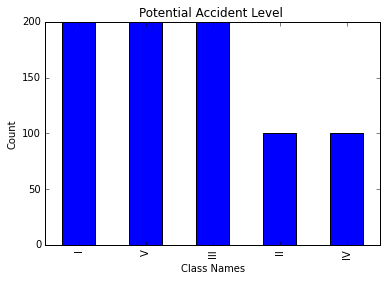

In [16]:
#Analysis of Potential Accident Level 
Pot_Acc_level = data_1['Potential_Accident_Level'].value_counts()


Pot_Acc_level.plot(kind = 'bar')
plt.title('Potential Accident Level ')
plt.ylabel('Count')
plt.xlabel('Class Names')
plt.show()

In [17]:
#taking new variable x_new for dependent Variable
X_new = data_1.Description
y = data_1.ylabeled

In [18]:
#y_enc = np_utils.to_categorical(y)
#y_enc

In [19]:
#Spliting the dataset as train and test dataset
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=1)

In [20]:
#Converting target column into array separately for train and test data
y_train_enc = to_categorical(y_train, 5)
y_test_enc = to_categorical(y_test, 5)
print(y_train_enc.shape)
print(y_test_enc.shape)

(640, 5)
(160, 5)


In [21]:
max_words = 6000 #Maximum words in the corpus
max_len = 100 #Max length of words in the sentense
tok = Tokenizer(num_words=max_words) # Calling tokenizer function
tok.fit_on_texts(X_train_txt.values.astype('U')) #fitting for text data
sequences = tok.texts_to_sequences(X_train_txt.values.astype('U')) #Converting words into vectors using text_to_sequence function 
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) #pad each sentence to be the same length

In [22]:
#shape of the train data, 640 rows of Accident description and 100 words in each description
sequences_matrix.shape

(640, 100)

In [23]:
#This is how one description looks 
sequences_matrix[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    1,  663,    2,   36,  803,  451,  190,
          3,   71,    4,    1,  209,  452,    1,   48,   82,  804, 1717,
          1,  183,   46,  276,    6,  165,   15,    1,  127, 1718,  523,
          1,   49,   11,    1,  735,  554,    2,    5,  805, 1719,  166,
         66,    8,   72,  249,   43,   15,    1,  118,    8,   29,   75,
        129, 1438,   75,    6,    1,  127,   23, 1439,   16,  287,    1,
        183,   29,  904,    1,   58,   21,  277,    4, 1440,  453,    3,
        330,   15,    5,   68,    2,   72,  249,   43,    1,   76,   32,
       1441], dtype=int32)

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


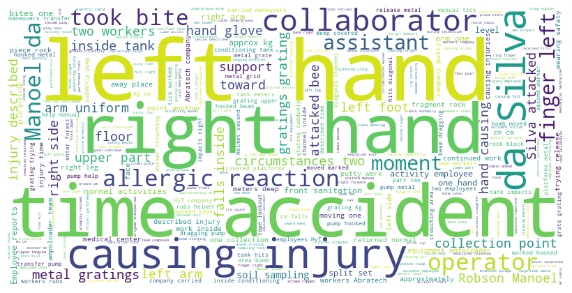

In [25]:
stopwords = STOPWORDS


wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(X_new.values))


plt.figure( figsize=(10,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


In [26]:
# Doing data preprocessing for test set separately
sequences_test = tok.texts_to_sequences(X_test_txt.values.astype('U'))
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [27]:
#Building the model
lstm_model_2= Sequential() # Sequential model API
lstm_model_2.add(tf.keras.layers.Input(shape=(None,))) #Input layer
lstm_model_2.add(tf.keras.layers.Embedding(5000, 100, mask_zero=True)) # Embedding layer
lstm_model_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False,recurrent_dropout=0.1))) # bidirectional Lstm layer
lstm_model_2.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))# hidden dense layer with relu activation
lstm_model_2.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax))# output layer with softmax activation

lstm_model_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) #Compiling the model using these parameters 

In [28]:
lstm_model_2.summary()# Summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 681,405
Trainable params: 681,405
Non-trainable params: 0
_________________________________________________________________


In [29]:
#fitting the model with train data, batch_size 8 and 20 epochs
LSTM_Model_2 = lstm_model_2.fit(sequences_matrix, y_train_enc, batch_size=8, epochs=20,validation_split=0.15,verbose=2)

Epoch 1/20
68/68 - 21s - loss: 1.3785 - accuracy: 0.4375 - val_loss: 0.7850 - val_accuracy: 0.7604
Epoch 2/20
68/68 - 17s - loss: 0.6057 - accuracy: 0.7463 - val_loss: 0.4246 - val_accuracy: 0.8750
Epoch 3/20
68/68 - 17s - loss: 0.4699 - accuracy: 0.8382 - val_loss: 0.3874 - val_accuracy: 0.8646
Epoch 4/20
68/68 - 17s - loss: 0.1336 - accuracy: 0.9688 - val_loss: 0.3265 - val_accuracy: 0.8750
Epoch 5/20
68/68 - 17s - loss: 0.0502 - accuracy: 0.9890 - val_loss: 0.3153 - val_accuracy: 0.9167
Epoch 6/20
68/68 - 17s - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.2943 - val_accuracy: 0.9167
Epoch 7/20
68/68 - 17s - loss: 0.0182 - accuracy: 0.9982 - val_loss: 0.3999 - val_accuracy: 0.9062
Epoch 8/20
68/68 - 17s - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.3168 - val_accuracy: 0.9062
Epoch 9/20
68/68 - 17s - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.3279 - val_accuracy: 0.9167
Epoch 10/20
68/68 - 17s - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.4029 - val_accuracy: 0.8958
Epoch 11/

In [30]:
# predicting y_test by giving x_test description
pred_LSTM = lstm_model_2.predict_classes(sequences_matrix_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
#Creating the dataframe for y predicted values
pred_LSTM_2 = pd.DataFrame(pred_LSTM,columns=['pred'])
pred_LSTM_2

,pred
0,4
1,2
2,4
3,3
4,0
...,...
155,0
156,4
157,3
158,2


In [32]:
print("Confusion matrics for Bi-directional LSTM model",metrics.confusion_matrix(y_test,pred_LSTM_2.pred))
print("F1 score for Bi-directional LSTM model",metrics.f1_score(y_test,pred_LSTM_2.pred,average=None))
print("Recall score for Bi-directional LSTM model",metrics.recall_score(y_test,pred_LSTM_2.pred,average=None))

Confusion matrics for Bi-directional LSTM model [[39  1  0  0  0]
 [ 0 13  2  2  0]
 [ 0  1 35  5  0]
 [ 0  2  8 15  1]
 [ 0  0  0  0 36]]
F1 score for Bi-directional LSTM model [0.98734177 0.76470588 0.81395349 0.625      0.98630137]
Recall score for Bi-directional LSTM model [0.975      0.76470588 0.85365854 0.57692308 1.        ]


In [49]:
import seaborn as sns 
from sklearn import metrics 

def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm.T,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
  plt.xlabel("Observed")
  plt.ylabel('Predicted')
  plt.show()

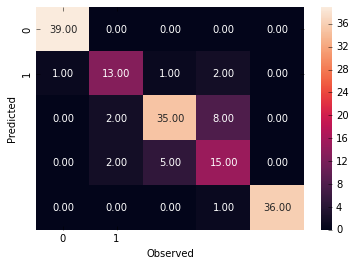

None


In [50]:
print(draw_cm(y_test,pred_LSTM_2.pred))

In [33]:
print("Bidirectional lstm_model ACCURACY:",metrics.accuracy_score(y_test,pred_LSTM_2.pred))
print("===> **Bidirectional lstm_model F1 SCORE",metrics.f1_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model  Recall SCORE",metrics.recall_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model Precision SCORE",metrics.precision_score(y_test, pred_LSTM_2.pred,average=None))

Bidirectional lstm_model ACCURACY: 0.8625
===> **Bidirectional lstm_model F1 SCORE [0.98734177 0.76470588 0.81395349 0.625      0.98630137]
===> **Bidirectional lstm_model  Recall SCORE [0.975      0.76470588 0.85365854 0.57692308 1.        ]
===> **Bidirectional lstm_model Precision SCORE [1.         0.76470588 0.77777778 0.68181818 0.97297297]


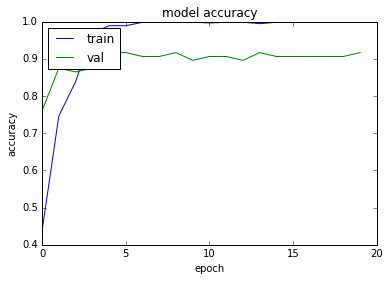

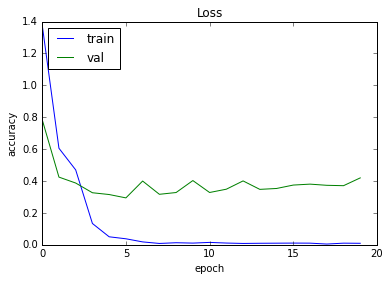

In [34]:
plt.plot(LSTM_Model_2.history['accuracy'])
plt.plot(LSTM_Model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(LSTM_Model_2.history['loss'])
plt.plot(LSTM_Model_2.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
# convert categorical variable into dummy/indicator variables.
targetdf = pd.get_dummies(data['Potential_Accident_Level'])

In [36]:
#predict function 
def predict(Description):
    max_words = 6000
    max_len = 100
    text =word_tokenize(Description)
    tok = Tokenizer(num_words=max_words)
    tok.fit_on_texts(text)
    sequences = tok.texts_to_sequences(text)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
    input_data=sequences_matrix
    output = lstm_model_2.predict(input_data)
    index = np.argmax(output[0])
    print(targetdf.columns[index])

In [37]:
predict('While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.')

II


In [38]:
predict('Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. CristÃ³bal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.')

III


In [39]:
predict('At approximately 04:50 p.m., when the mechanic technician JosÃ© of the Tecnomin verified the transmission belts of the HM-100 pump at the Acid plant, he proceeded to turn the pulley manually; unexpectedly at that instant the electrician supervisor Miguel of the EKA Mining grabs the transmission belts to verify their tension, at which point the finger traps.')

V


In [40]:
predict('Approximately 1:40 p.m. in circumstances that shotcrete was launched in the Nv. 1680 BP 255 of the OB2B, after finishing the launch of the first mixkret 113, the assistant of the alpha, Mr. Albertico asks the operator of the mixkret 113, Mr. Jhony to move the mixkret 116, so that access, finding in the cockpit of the mixkret the operator of the Launcher team, Mr. Danon asks him to come down. When the team started, he noticed that Mr. Danon (injured) was imprisoned between the team (height of the left rear rim) and the Hastial de la Labor.')

I
